In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
train=pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1512629738&Signature=J5A7lc6EBbmwqrQ%2FwscWWjv10E%2F4ylOiT8EgIxRX5ANv0LQoewgksImPCmTEHvK3f7tZbju8saRH1aPytnGRbyHxepE4uhi%2Bm3VQkay49QVBswFST08aCHHNdyQPqOWczWwSkg96mD97j4Cyoy8pymvbyLYz%2F1%2F3o5FImeDx0MdWVX64vwAt28MbaWM%2FtISiit0R4IH8Dg8RQL2%2BC%2F%2BZQGVvHsfWMNVu7w0copZ%2FWo6MYJkyoXAHO938CumHuo5tLMhf7ETmjqBn8iHKo3ugVOrldU5UpQGCMCWn7hxh8QTATvWEBLzaUtWsmtLXc8F%2FxKO6MjnKP0XQIKJRCzbwqw%3D%3D")
test=pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1512630038&Signature=JPT37ujeR%2F%2Bv9Gbm76roHl5IV8VFgBFr0S80tw6rzT31hKcgVrP1%2B6ihvsq%2F517iYcRA4SIPCr7rZzvFQZf7pgcz%2FHtyscb%2FEORcwql8mUdUltebKVDUH0HwIJhGOKLI65kHiTdtO93EYT1GAhUQy9EE2CSJbA1K%2B7nTjBvQ94nGBkcB7sFGrY5hq%2Frpd3vIowkddVx3KExCLxb6nD5lfArWQRJVbbFuyNFg4k%2FCEHSkHWOEsnxJFSk%2Fol%2FzEvhCREIGxInhaG5YxlPP8DRMQIUjW4TU%2FKOAVVMKcZGkoPeoKwwApxZSeWtmmvi1Rkg2H6rG1kVUgjReHSyMpQyh6Q%3D%3D")
combine=[train,test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
fem=train[train["Sex"]=="female"]

In [5]:
print(fem[fem["Survived"]==1].count())

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64


In [6]:

print(233/891)


0.2615039281705948


In [7]:
train.info()
print("---------"*5)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Connolly, Miss. Kate",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [10]:
print(577/891)

0.6475869809203143


In [11]:
train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[["Sex","Survived"]].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train[["Embarked","Survived"]].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
train[["SibSp","Survived"]].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train[["Parch","Survived"]].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


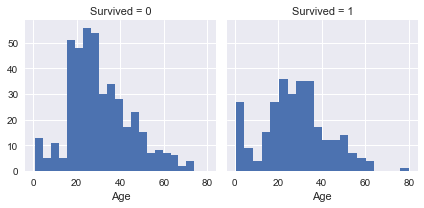

In [16]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,"Age",bins=20)

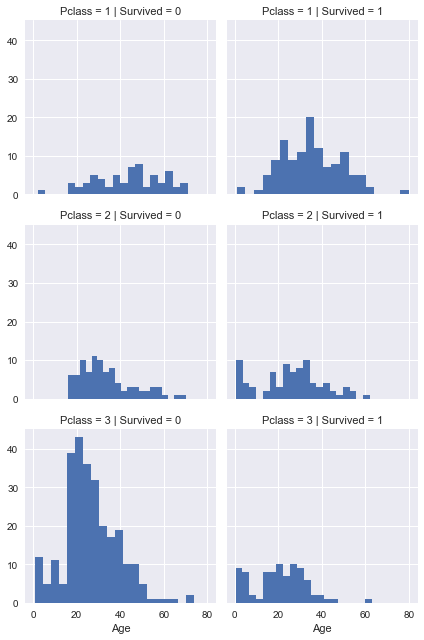

In [17]:
g=sns.FacetGrid(train,col='Survived',row='Pclass')
g.map(plt.hist,"Age",bins=20)

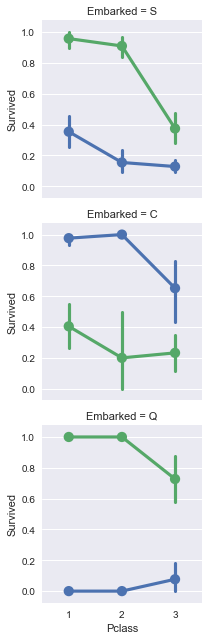

In [18]:
g= sns.FacetGrid(train,row='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')


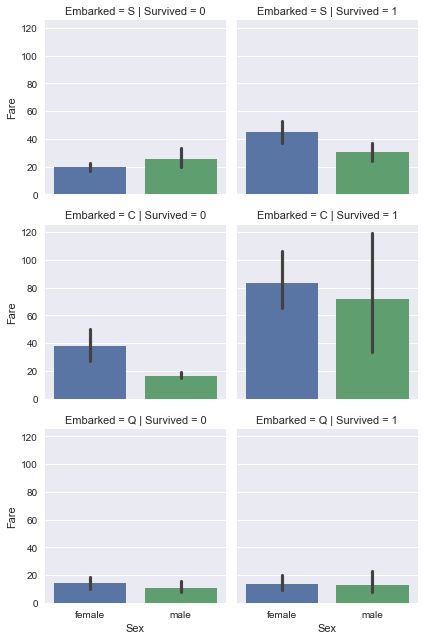

In [19]:
g=sns.FacetGrid(train,row='Embarked',col='Survived')
g.map(sns.barplot,'Sex','Fare',palette="deep")

In [20]:
for dataset in combine:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
    
    master_ave = dataset.loc[dataset.Name.str.contains('Master'), 'Age'].mean()
    mr_ave = dataset.loc[dataset.Name.str.contains('Mr'), 'Age'].mean() 
    miss_ave = dataset.loc[dataset.Name.str.contains('Miss'), 'Age'].mean() 
    mrs_ave = dataset.loc[dataset.Name.str.contains('Mrs'), 'Age'].mean() 
    dataset.loc[dataset.Name.str.contains('Mraster') & dataset.Age.isnull(), 'Age'] = master_ave
    dataset.loc[dataset.Name.str.contains('Mr') & dataset.Age.isnull(), 'Age'] = mr_ave
    dataset.loc[dataset.Name.str.contains('Miss') & dataset.Age.isnull(), 'Age'] = miss_ave
    dataset.loc[dataset.Name.str.contains('Mrs') & dataset.Age.isnull(), 'Age'] = mrs_ave
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
    
    dataset.loc[ dataset['Age'] <= 16, 'Age']                          = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4
    
    #Fare
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']                               = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']                                  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [21]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(train['Title'],train['Sex'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for i in combine:
    i['Title']=i['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    i['Title']=i['Title'].replace('Mlle','Miss')
    i['Title']=i['Title'].replace('Mme','Miss')
    i['Title']=i['Title'].replace('Ms','Miss')
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [23]:
dictionary= {"Master":1,"Miss":2,"Mr":3,"Mrs":4,"Rare":5}
for i in combine:
    i['Title']=i['Title'].map(dictionary)
    i['Title']=i['Title'].fillna(0)


In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0,NaN,S,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3,C85,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3,C123,S,1,4
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1,NaN,S,0,3


In [25]:
###

train= train.drop(['Name','PassengerId'],axis=1)
test=test.drop(['Name'],axis=1)
combine=[train,test]

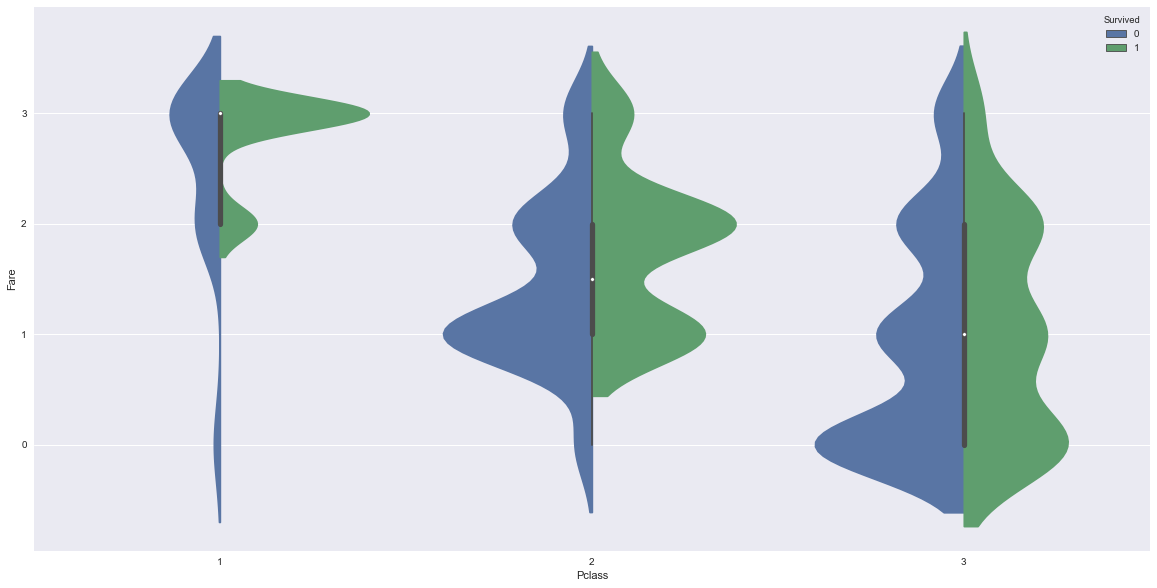

In [26]:
plt.figure(figsize=(20,10))
sns.violinplot(x="Pclass",y="Fare",hue="Survived",split=True,data=train)
plt.show()

In [27]:
dictionary={"male":0,"female":1}
for i in combine:
    i["Sex"]=i["Sex"].map(dictionary)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title
0,0,3,0,1.0,1,0,A/5 21171,0,NaN,S,0,3
1,1,1,1,2.0,1,0,PC 17599,3,C85,C,1,4
2,1,3,1,1.0,0,0,STON/O2. 3101282,1,NaN,S,0,2
3,1,1,1,2.0,1,0,113803,3,C123,S,1,4
4,0,3,0,2.0,0,0,373450,1,NaN,S,0,3


In [28]:
train["Age"]=train["Age"].fillna(train["Age"].mean())
train["Embarked"]=train["Embarked"].fillna("S")


In [29]:
##x=train.drop(["Pclass","Sex","SibSp","Parch","Embarked","Title"],axis=1)
##sns.pairplot(data=x,hue="Survived")

In [30]:
test.describe(include=['O'])

,Ticket,Cabin,Embarked
count,418,91,418
unique,363,76,3
top,PC 17608,B57 B59 B63 B66,S
freq,5,3,270


In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title
0,0,3,0,1.0,1,0,A/5 21171,0,NaN,0,0,3
1,1,1,1,2.0,1,0,PC 17599,3,C85,1,1,4
2,1,3,1,1.0,0,0,STON/O2. 3101282,1,NaN,0,0,2
3,1,1,1,2.0,1,0,113803,3,C123,0,1,4
4,0,3,0,2.0,0,0,373450,1,NaN,0,0,3


In [32]:
for data in combine:
    data.loc[(data["Age"]<=15),"Age"]=1
    data.loc[(data["Age"]>15) & (data["Age"]<=30),"Age"]=2
    data.loc[(data["Age"]>30) & (data["Age"]<=45),"Age"]=3
    data.loc[(data["Age"]>45) & (data["Age"]<=60),"Age"]=4
    data.loc[(data["Age"]>60) & (data["Age"]<=80),"Age"]=5
    data.loc[(data["Age"]>80),"Age"]=6
    
train.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title
0,0,3,0,1.0,1,0,A/5 21171,0,NaN,0,0,3
1,1,1,1,1.0,1,0,PC 17599,3,C85,1,1,4
2,1,3,1,1.0,0,0,STON/O2. 3101282,1,NaN,0,0,2
3,1,1,1,1.0,1,0,113803,3,C123,0,1,4
4,0,3,0,1.0,0,0,373450,1,NaN,0,0,3


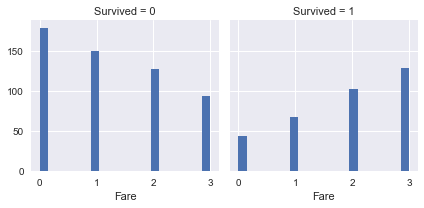

In [33]:
g= sns.FacetGrid(train,col="Survived")
g.map(plt.hist,"Fare",bins=20)

In [34]:
for data in combine:
    data.loc[(data["Fare"]<10),"Fare"]=0
    data.loc[(data["Fare"]>=10) & (data["Fare"]<20),"Fare"]=1
    data.loc[(data["Fare"]>=20) & (data["Fare"]<30),"Fare"]=2
    data.loc[(data["Fare"]>=30),"Fare"]=3
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title
0,0,3,0,1.0,1,0,A/5 21171,0,NaN,0,0,3
1,1,1,1,1.0,1,0,PC 17599,0,C85,1,1,4
2,1,3,1,1.0,0,0,STON/O2. 3101282,0,NaN,0,0,2
3,1,1,1,1.0,1,0,113803,0,C123,0,1,4
4,0,3,0,1.0,0,0,373450,0,NaN,0,0,3


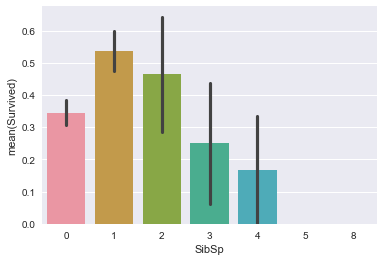

In [35]:
sns.barplot(x="SibSp",y="Survived",data=train)

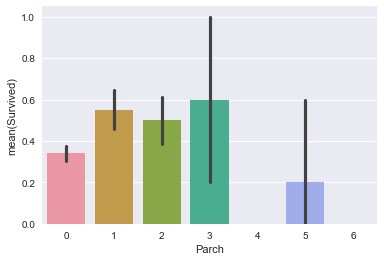

In [36]:
sns.barplot(x="Parch",y="Survived",data=train)

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


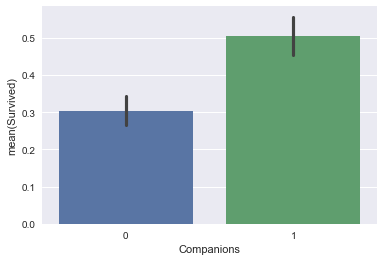

In [37]:
train["Companions"]=train["SibSp"]+train["Parch"]
train["Companions"].loc[(train["Companions"])>0]=1
train["Companions"].loc[(train["Companions"])==0]=0
test["Companions"]=test["SibSp"]+test["Parch"]
test["Companions"].loc[(test["Companions"])>0]=1
test["Companions"].loc[(test["Companions"])==0]=0
sns.barplot(x='Companions', y="Survived",data=train,)

In [38]:
train=train.drop(["SibSp","Parch","Ticket","Cabin"],axis=1)
test=test.drop(["SibSp","Parch","Ticket","Cabin"],axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Title,Companions
0,0,3,0,1.0,0,0,0,3,1
1,1,1,1,1.0,0,1,1,4,1
2,1,3,1,1.0,0,0,0,2,0
3,1,1,1,1.0,0,0,1,4,1
4,0,3,0,1.0,0,0,0,3,0


In [39]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [41]:
gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

gaussian.score(X_train, Y_train)

0.7620650953984287

In [42]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.010000000000005

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.950000000000003

In [44]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

rf.score(X_train, Y_train)

0.83950617283950613

In [45]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.7912457912457912

In [46]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [47]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(40, 30), random_state=1)
clf.fit(X_train, Y_train) 
Y_pred = clf.predict(X_test)
clf.score(X_train, Y_train)

0.83950617283950613

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
seed=7
num_trees=30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
model.score(X_train,Y_train)


0.81930415263748602

In [49]:
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('adaboost', model))
estimators.append(('DT', decision_tree))
estimators.append(('svm', linear_svc))
estimators.append(('NN', clf))
estimators.append(('LOGREG', logreg))
estimators.append(('randomForest', rf))
estimators.append(('gaussian', gaussian))
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred = ensemble.predict(X_test)
ensemble.score(X_train,Y_train)

0.83389450056116721

In [50]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [51]:
submission.to_csv("submission.csv",sep=',',index=False)